In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive
from Code.UCBLearnerSlidingWindow import UCBLearnerSlidingWindow

%matplotlib inline

In [2]:
cust_json = "customer_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [[0, 2, 0, 2, 0], [3, 3, 1, 2, 0], [3, 2, 2, 1, 2]] [1053.470556, 2306.3305568000005, 4261.02606112] [10.534705559999999, 23.063305568000004, 42.610260611200005]


In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.5  0.2  0.1  0.  ]
 [0.7  0.6  0.4  0.1 ]
 [0.7  0.5  0.35 0.2 ]
 [0.9  0.7  0.6  0.5 ]
 [0.5  0.3  0.2  0.1 ]]
conv_rate: [[0.8  0.5  0.4  0.3 ]
 [0.7  0.6  0.35 0.2 ]
 [0.9  0.5  0.3  0.2 ]
 [0.7  0.5  0.4  0.35]
 [0.6  0.45 0.25 0.1 ]]
conv_rate: [[0.8 0.2 0.2 0.2]
 [0.4 0.8 0.8 0.2]
 [0.6 0.6 0.4 0.3]
 [0.3 0.9 0.6 0.3]
 [0.3 0.4 0.6 0.6]]
conv_rate: [[0.9  0.5  0.3  0.1 ]
 [0.4  0.3  0.2  0.1 ]
 [0.6  0.5  0.3  0.2 ]
 [0.65 0.5  0.4  0.35]
 [0.7  0.6  0.4  0.3 ]]
[2, 2, 3, 2, 2]
t:  1
phase 0
[3, 2, 2, 3, 1]
t:  2
phase 0
[1, 3, 3, 3, 0]
t:  3
phase 0
[3, 2, 1, 2, 1]
t:  4
phase 0
[2, 2, 1, 3, 3]
t:  5
phase 0
[3, 2, 1, 2, 0]
t:  6
phase 0
[1, 2, 3, 2, 0]
t:  7
phase 0
[2, 3, 2, 3, 2]
t:  8
phase 0
[3, 2, 1, 2, 0]
t:  9
phase 0
loading: [=                             ] 3.3%[0, 2, 1, 2, 0]
t:  10
phase 0
[0, 2, 1, 3, 2]
t:  11
phase 0
[2, 1, 3, 2, 1]
t:  12
phase 0


[3, 2, 1, 2, 0]
t:  199
phase 1
loading: [====================          ] 66.7%[3, 2, 3, 2, 0]
t:  200
phase 2
set customer
conv_rate: [[0.2 0.4 0.8 0.9]
 [0.6 0.3 0.8 0.2]
 [0.6 0.4 0.9 0.5]
 [0.8 0.7 0.5 0.5]
 [0.1 0.9 0.9 0.3]]
conv_rate: [[0.9 0.1 0.1 0.5]
 [0.3 0.1 0.1 0.6]
 [0.7 0.5 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.7 0.2 0.3 0.2]]
conv_rate: [[0.7 0.7 0.7 0.3]
 [0.4 0.9 0.9 0.5]
 [0.6 0.5 0.7 0.5]
 [0.9 0.6 0.7 0.8]
 [0.7 0.8 0.7 0.9]]
conv_rate: [[0.6 0.6 0.2 0.4]
 [0.4 0.4 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.4 0.8 0.5 0.9]
 [0.2 0.9 0.7 0.2]]
abrupt change
[3, 3, 3, 3, 3]
t:  201
phase 2
[3, 2, 3, 3, 2]
t:  202
phase 2
[3, 2, 3, 3, 2]
t:  203
phase 2
[3, 2, 2, 3, 2]
t:  204
phase 2
[3, 2, 2, 3, 2]
t:  205
phase 2
[3, 2, 2, 3, 2]
t:  206
phase 2
[3, 2, 3, 3, 2]
t:  207
phase 2
[3, 2, 2, 3, 2]
t:  208
phase 2
[3, 2, 2, 2, 2]
t:  209
phase 2
loading: [=====================         ] 70.0%[3, 2, 2, 3, 2]
t:  210
phase 2
[3, 3, 2, 3, 2]
t:  211
phase 2
[3, 2, 2, 3, 2]
t:  212
phase 2
[3,

[0, 2, 0, 3, 3]
t:  98
phase 0
[3, 3, 0, 2, 0]
t:  99
phase 0
loading: [==========                    ] 33.3%[2, 2, 3, 2, 1]
t:  100
phase 1
set customer
conv_rate: [[0.3 0.8 0.5 0.4]
 [0.5 0.9 0.6 0.5]
 [0.2 0.7 0.1 0.4]
 [0.1 0.5 0.8 0.4]
 [0.9 0.1 0.6 0.6]]
conv_rate: [[0.6 0.6 0.7 0.6]
 [0.3 0.3 0.6 0.1]
 [0.2 0.9 0.5 0.6]
 [0.2 0.5 0.2 0.9]
 [0.8 0.6 0.5 0.1]]
conv_rate: [[0.3 0.7 0.7 0.8]
 [0.7 0.1 0.8 0.1]
 [0.6 0.9 0.2 0.2]
 [0.7 0.5 0.3 0.5]
 [0.1 0.3 0.2 0.8]]
conv_rate: [[0.7 0.1 0.3 0.9]
 [0.2 0.8 0.8 0.2]
 [0.2 0.6 0.3 0.8]
 [0.2 0.6 0.1 0.1]
 [0.9 0.1 0.6 0.2]]
[2, 2, 3, 2, 3]
t:  101
phase 1
[2, 2, 0, 2, 3]
t:  102
phase 1
[2, 2, 1, 2, 3]
t:  103
phase 1
[2, 2, 1, 2, 3]
t:  104
phase 1
[2, 2, 1, 2, 3]
t:  105
phase 1
[2, 2, 1, 2, 3]
t:  106
phase 1
[2, 2, 1, 2, 3]
t:  107
phase 1
[2, 2, 1, 2, 3]
t:  108
phase 1
[2, 2, 3, 2, 3]
t:  109
phase 1
loading: [===========                   ] 36.7%[2, 2, 1, 2, 3]
t:  110
phase 1
[2, 2, 1, 2, 3]
t:  111
phase 1
[2, 2, 1, 2, 3]
t: 

[3, 2, 2, 3, 2]
t:  297
phase 2
[3, 2, 2, 3, 2]
t:  298
phase 2
[3, 2, 2, 3, 2]
t:  299
phase 2
Iteration # 3
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.5  0.2  0.1  0.  ]
 [0.7  0.6  0.4  0.1 ]
 [0.7  0.5  0.35 0.2 ]
 [0.9  0.7  0.6  0.5 ]
 [0.5  0.3  0.2  0.1 ]]
conv_rate: [[0.8  0.5  0.4  0.3 ]
 [0.7  0.6  0.35 0.2 ]
 [0.9  0.5  0.3  0.2 ]
 [0.7  0.5  0.4  0.35]
 [0.6  0.45 0.25 0.1 ]]
conv_rate: [[0.8 0.2 0.2 0.2]
 [0.4 0.8 0.8 0.2]
 [0.6 0.6 0.4 0.3]
 [0.3 0.9 0.6 0.3]
 [0.3 0.4 0.6 0.6]]
conv_rate: [[0.9  0.5  0.3  0.1 ]
 [0.4  0.3  0.2  0.1 ]
 [0.6  0.5  0.3  0.2 ]
 [0.65 0.5  0.4  0.35]
 [0.7  0.6  0.4  0.3 ]]
[2, 2, 3, 3, 2]
t:  1
phase 0
[3, 2, 2, 3, 1]
t:  2
phase 0
[1, 3, 2, 3, 1]
t:  3
phase 0
[3, 2, 2, 3, 2]
t:  4
phase 0
[2, 3, 3, 3, 0]
t:  5
phase 0
[3, 2, 1, 3, 0]
t:  6
phase 0
[1, 3, 1, 3, 0]
t:  7
phase 0
[0, 2, 3, 2, 2]
t:  8
phase 0
[3, 1, 2, 3, 3]
t:  9
phase 0
loading: [=                             ] 3

[3, 3, 1, 2, 3]
t:  197
phase 1
[3, 3, 1, 2, 2]
t:  198
phase 1
[3, 3, 1, 2, 0]
t:  199
phase 1
loading: [====================          ] 66.7%[3, 3, 1, 2, 2]
t:  200
phase 2
set customer
conv_rate: [[0.2 0.4 0.8 0.9]
 [0.6 0.3 0.8 0.2]
 [0.6 0.4 0.9 0.5]
 [0.8 0.7 0.5 0.5]
 [0.1 0.9 0.9 0.3]]
conv_rate: [[0.9 0.1 0.1 0.5]
 [0.3 0.1 0.1 0.6]
 [0.7 0.5 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.7 0.2 0.3 0.2]]
conv_rate: [[0.7 0.7 0.7 0.3]
 [0.4 0.9 0.9 0.5]
 [0.6 0.5 0.7 0.5]
 [0.9 0.6 0.7 0.8]
 [0.7 0.8 0.7 0.9]]
conv_rate: [[0.6 0.6 0.2 0.4]
 [0.4 0.4 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.4 0.8 0.5 0.9]
 [0.2 0.9 0.7 0.2]]
abrupt change
[3, 2, 3, 3, 3]
t:  201
phase 2
[3, 2, 3, 3, 2]
t:  202
phase 2
[3, 2, 2, 3, 2]
t:  203
phase 2
[3, 2, 2, 3, 2]
t:  204
phase 2
[3, 2, 2, 2, 2]
t:  205
phase 2
[3, 2, 2, 2, 2]
t:  206
phase 2
[3, 2, 3, 2, 2]
t:  207
phase 2
[3, 2, 2, 3, 2]
t:  208
phase 2
[3, 2, 2, 3, 2]
t:  209
phase 2
loading: [=====================         ] 70.0%[3, 3, 2, 3, 2]
t:  210
phase 2
[3,

(3, 300)

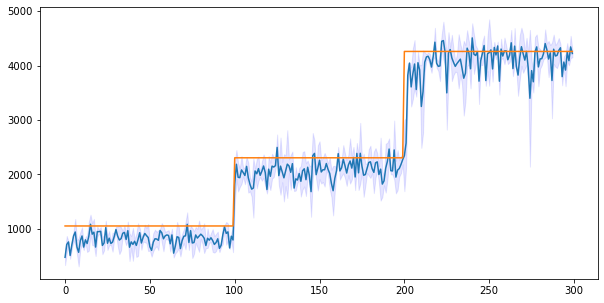

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)


plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

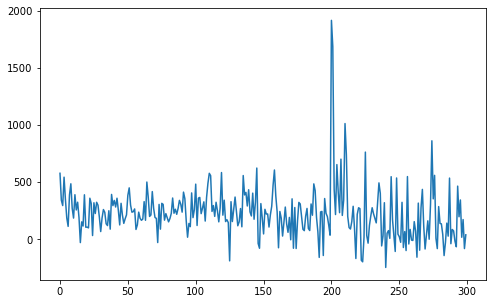

In [7]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

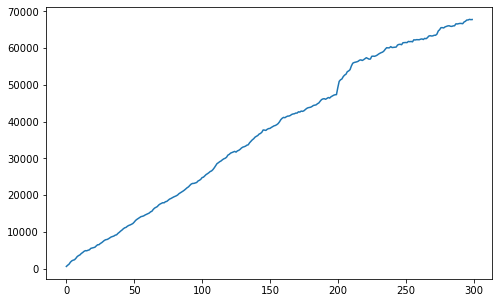

In [8]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [9]:
n_products

5

In [10]:
n_arms

4

In [11]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [12]:
array

array([[0.4, 0.7, 0.8, 0.8],
       [0.3, 0.9, 0.8, 0.1],
       [0.6, 0.3, 0.6, 0.4],
       [0.8, 0.5, 0.7, 0.5],
       [0.7, 0.2, 0.6, 0.8]])

In [13]:
randrange(0,1)

0

In [14]:
cust_json = "customer_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [[0, 2, 0, 2, 0], [3, 3, 1, 2, 0], [3, 2, 2, 1, 2]] [1053.470556, 2306.3305568000005, 4261.02606112] [10.534705559999999, 23.063305568000004, 42.610260611200005]


In [15]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerSlidingWindow(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.5  0.2  0.1  0.  ]
 [0.7  0.6  0.4  0.1 ]
 [0.7  0.5  0.35 0.2 ]
 [0.9  0.7  0.6  0.5 ]
 [0.5  0.3  0.2  0.1 ]]
conv_rate: [[0.8  0.5  0.4  0.3 ]
 [0.7  0.6  0.35 0.2 ]
 [0.9  0.5  0.3  0.2 ]
 [0.7  0.5  0.4  0.35]
 [0.6  0.45 0.25 0.1 ]]
conv_rate: [[0.8 0.2 0.2 0.2]
 [0.4 0.8 0.8 0.2]
 [0.6 0.6 0.4 0.3]
 [0.3 0.9 0.6 0.3]
 [0.3 0.4 0.6 0.6]]
conv_rate: [[0.9  0.5  0.3  0.1 ]
 [0.4  0.3  0.2  0.1 ]
 [0.6  0.5  0.3  0.2 ]
 [0.65 0.5  0.4  0.35]
 [0.7  0.6  0.4  0.3 ]]
[2, 2, 2, 3, 2]
t:  1
phase 0
[3, 2, 3, 3, 1]
t:  2
phase 0
[1, 2, 1, 3, 3]
t:  3
phase 0
[1, 3, 1, 2, 2]
t:  4
phase 0
[3, 2, 3, 2, 0]
t:  5
phase 0
[2, 2, 2, 2, 0]
t:  6
phase 0
[3, 2, 1, 2, 2]
t:  7
phase 0
[2, 3, 2, 2, 0]
t:  8
phase 0
[3, 2, 3, 2, 1]
t:  9
phase 0
loading: [=                             ] 3.3%[0, 2, 2, 2, 2]
t:  10
phase 0
[0, 2, 0, 3, 0]
t:  11
phase 0
[3, 2, 0, 3, 3]
t:  12
phase 0


loading: [====================          ] 66.7%[3, 2, 3, 2, 0]
t:  200
phase 2
set customer
conv_rate: [[0.2 0.4 0.8 0.9]
 [0.6 0.3 0.8 0.2]
 [0.6 0.4 0.9 0.5]
 [0.8 0.7 0.5 0.5]
 [0.1 0.9 0.9 0.3]]
conv_rate: [[0.9 0.1 0.1 0.5]
 [0.3 0.1 0.1 0.6]
 [0.7 0.5 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.7 0.2 0.3 0.2]]
conv_rate: [[0.7 0.7 0.7 0.3]
 [0.4 0.9 0.9 0.5]
 [0.6 0.5 0.7 0.5]
 [0.9 0.6 0.7 0.8]
 [0.7 0.8 0.7 0.9]]
conv_rate: [[0.6 0.6 0.2 0.4]
 [0.4 0.4 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.4 0.8 0.5 0.9]
 [0.2 0.9 0.7 0.2]]
[3, 2, 3, 2, 0]
t:  201
phase 2
[3, 2, 3, 2, 0]
t:  202
phase 2
[3, 3, 1, 2, 2]
t:  203
phase 2
[3, 2, 3, 2, 2]
t:  204
phase 2
[3, 2, 3, 2, 2]
t:  205
phase 2
[3, 2, 3, 2, 2]
t:  206
phase 2
[3, 2, 1, 3, 2]
t:  207
phase 2
[3, 2, 3, 2, 2]
t:  208
phase 2
[3, 2, 1, 2, 2]
t:  209
phase 2
loading: [=====================         ] 70.0%[3, 2, 3, 3, 2]
t:  210
phase 2
[3, 3, 3, 2, 2]
t:  211
phase 2
[3, 2, 3, 2, 2]
t:  212
phase 2
[3, 2, 3, 3, 2]
t:  213
phase 2
[3, 2, 3, 3, 2]
t

loading: [==========                    ] 33.3%[2, 2, 1, 2, 0]
t:  100
phase 1
set customer
conv_rate: [[0.3 0.8 0.5 0.4]
 [0.5 0.9 0.6 0.5]
 [0.2 0.7 0.1 0.4]
 [0.1 0.5 0.8 0.4]
 [0.9 0.1 0.6 0.6]]
conv_rate: [[0.6 0.6 0.7 0.6]
 [0.3 0.3 0.6 0.1]
 [0.2 0.9 0.5 0.6]
 [0.2 0.5 0.2 0.9]
 [0.8 0.6 0.5 0.1]]
conv_rate: [[0.3 0.7 0.7 0.8]
 [0.7 0.1 0.8 0.1]
 [0.6 0.9 0.2 0.2]
 [0.7 0.5 0.3 0.5]
 [0.1 0.3 0.2 0.8]]
conv_rate: [[0.7 0.1 0.3 0.9]
 [0.2 0.8 0.8 0.2]
 [0.2 0.6 0.3 0.8]
 [0.2 0.6 0.1 0.1]
 [0.9 0.1 0.6 0.2]]
[2, 3, 1, 2, 1]
t:  101
phase 1
[2, 3, 1, 3, 0]
t:  102
phase 1
[2, 3, 1, 2, 0]
t:  103
phase 1
[2, 3, 3, 2, 0]
t:  104
phase 1
[2, 3, 3, 2, 2]
t:  105
phase 1
[2, 3, 3, 2, 2]
t:  106
phase 1
[2, 3, 3, 2, 2]
t:  107
phase 1
[2, 3, 3, 2, 3]
t:  108
phase 1
[2, 3, 1, 2, 3]
t:  109
phase 1
loading: [===========                   ] 36.7%[2, 3, 2, 2, 3]
t:  110
phase 1
[2, 3, 3, 2, 3]
t:  111
phase 1
[2, 3, 1, 2, 3]
t:  112
phase 1
[2, 3, 0, 2, 3]
t:  113
phase 1
[2, 3, 3, 2, 3]
t

loading: [                              ] 0.0%[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.5  0.2  0.1  0.  ]
 [0.7  0.6  0.4  0.1 ]
 [0.7  0.5  0.35 0.2 ]
 [0.9  0.7  0.6  0.5 ]
 [0.5  0.3  0.2  0.1 ]]
conv_rate: [[0.8  0.5  0.4  0.3 ]
 [0.7  0.6  0.35 0.2 ]
 [0.9  0.5  0.3  0.2 ]
 [0.7  0.5  0.4  0.35]
 [0.6  0.45 0.25 0.1 ]]
conv_rate: [[0.8 0.2 0.2 0.2]
 [0.4 0.8 0.8 0.2]
 [0.6 0.6 0.4 0.3]
 [0.3 0.9 0.6 0.3]
 [0.3 0.4 0.6 0.6]]
conv_rate: [[0.9  0.5  0.3  0.1 ]
 [0.4  0.3  0.2  0.1 ]
 [0.6  0.5  0.3  0.2 ]
 [0.65 0.5  0.4  0.35]
 [0.7  0.6  0.4  0.3 ]]
[2, 2, 2, 3, 2]
t:  1
phase 0
[3, 2, 3, 3, 1]
t:  2
phase 0
[1, 2, 2, 2, 0]
t:  3
phase 0
[3, 3, 1, 2, 0]
t:  4
phase 0
[2, 2, 3, 3, 2]
t:  5
phase 0
[3, 2, 1, 2, 0]
t:  6
phase 0
[0, 2, 2, 2, 3]
t:  7
phase 0
[0, 2, 3, 2, 2]
t:  8
phase 0
[3, 2, 2, 2, 0]
t:  9
phase 0
loading: [=                             ] 3.3%[2, 3, 1, 3, 0]
t:  10
phase 0
[1, 2, 1, 2, 1]
t:  11
phase 0
[3, 1, 3, 3, 0]
t:  12
phase 0
[0, 2, 1, 2, 2

loading: [====================          ] 66.7%[3, 2, 3, 2, 3]
t:  200
phase 2
set customer
conv_rate: [[0.2 0.4 0.8 0.9]
 [0.6 0.3 0.8 0.2]
 [0.6 0.4 0.9 0.5]
 [0.8 0.7 0.5 0.5]
 [0.1 0.9 0.9 0.3]]
conv_rate: [[0.9 0.1 0.1 0.5]
 [0.3 0.1 0.1 0.6]
 [0.7 0.5 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.7 0.2 0.3 0.2]]
conv_rate: [[0.7 0.7 0.7 0.3]
 [0.4 0.9 0.9 0.5]
 [0.6 0.5 0.7 0.5]
 [0.9 0.6 0.7 0.8]
 [0.7 0.8 0.7 0.9]]
conv_rate: [[0.6 0.6 0.2 0.4]
 [0.4 0.4 0.7 0.8]
 [0.3 0.9 0.1 0.8]
 [0.4 0.8 0.5 0.9]
 [0.2 0.9 0.7 0.2]]
[3, 3, 3, 2, 0]
t:  201
phase 2
[3, 2, 3, 2, 0]
t:  202
phase 2
[3, 2, 3, 2, 2]
t:  203
phase 2
[3, 2, 3, 3, 2]
t:  204
phase 2
[3, 2, 3, 2, 2]
t:  205
phase 2
[3, 2, 3, 3, 2]
t:  206
phase 2
[3, 2, 3, 2, 2]
t:  207
phase 2
[3, 2, 3, 3, 2]
t:  208
phase 2
[3, 2, 3, 2, 2]
t:  209
phase 2
loading: [=====================         ] 70.0%[3, 2, 3, 2, 2]
t:  210
phase 2
[3, 2, 3, 2, 2]
t:  211
phase 2
[3, 2, 3, 2, 2]
t:  212
phase 2
[3, 2, 3, 3, 2]
t:  213
phase 2
[3, 2, 3, 3, 2]
t

(3, 300)

In [16]:
ucb6_learner.reports

[(array([59, 43, 47, 19, 27]), array([57, 40, 18,  8, 25]), [3, 2, 3, 2, 2]),
 (array([60, 45, 48, 13, 30]), array([53, 39, 21,  3, 28]), [3, 2, 3, 3, 2]),
 (array([53, 33, 35, 15, 22]), array([46, 28, 18, 14, 19]), [3, 2, 3, 1, 2]),
 (array([54, 45, 43, 14, 26]), array([49, 36, 18,  9, 23]), [3, 2, 3, 1, 2]),
 (array([61, 51, 42,  8, 26]), array([54, 40, 23,  6, 22]), [3, 2, 3, 1, 2]),
 (array([62, 41, 44, 14, 24]), array([56, 32, 18,  5, 23]), [3, 2, 3, 2, 2]),
 (array([54, 45, 45, 17, 32]), array([51, 34, 27, 12, 31]), [3, 2, 3, 1, 2]),
 (array([57, 35, 36, 13, 26]), array([50, 29, 20, 10, 23]), [3, 2, 3, 2, 2]),
 (array([57, 49, 41, 13, 22]), array([51, 37, 24,  7, 22]), [3, 2, 3, 2, 2]),
 (array([64, 41, 42,  8, 24]), array([57, 33, 22,  7, 19]), [3, 2, 3, 2, 2]),
 (array([60, 39, 34,  9, 28]), array([54, 31, 16,  3, 19]), [3, 2, 3, 3, 2]),
 (array([51, 38, 46, 14, 25]), array([47, 31, 17,  9, 25]), [3, 2, 3, 2, 2]),
 (array([62, 40, 34, 15, 37]), array([55, 28, 18, 12, 33]), [3, 

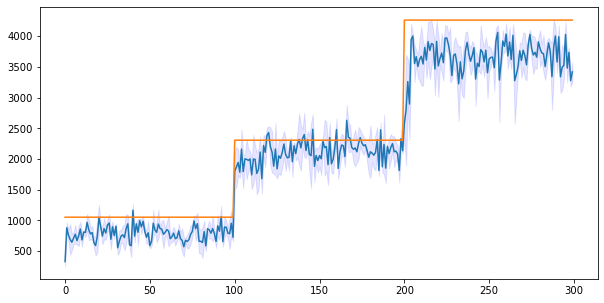

In [17]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

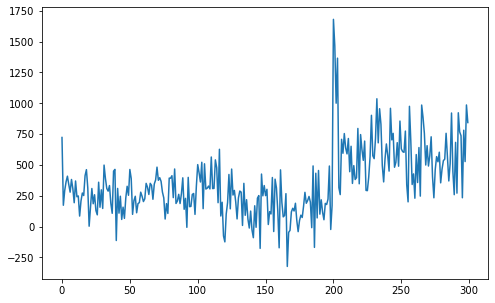

In [18]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

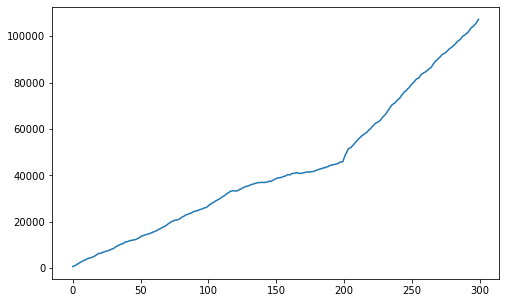

In [19]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()